<a href="https://colab.research.google.com/github/RJKool/Food-Sales-Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [3]:
#IMPORT DATASET
df = pd.read_csv("/content/drive/MyDrive/05 - WEEK 5/sales_predictions ORIGINAL.csv")
display( df.head() )
df.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df_backup = df.copy()   #Making backup copy of original untouched dataframe.
df.duplicated().sum()   #Checking the total number of duplicated rows of data.

0

In [5]:
#Need to explore values of all columns.
df_keys = df.keys()  #Getting key name into a list format to iterate with in for loop.

count = 0
for x in df_keys:
  print( f"{x} COLUMN" )
  print( df[df_keys[count]].value_counts() )
  print()
  count += 1

Item_Identifier COLUMN
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Weight COLUMN
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Item_Fat_Content COLUMN
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Visibility COLUMN
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Item_Type COLUMN
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    6

#INSPECTING DATA



In [6]:
#Column "Item_Fat_Content" has labels that need to be relabled.
display( df["Item_Fat_Content"].value_counts() )
print()

df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

display( df["Item_Fat_Content"].value_counts() )   #Confirming modifications.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
#"Outlet_Size" catagory should be changed from "High" to "Large"
display( df["Outlet_Size"].value_counts() )
print()

#Replacing "High" with "Large" in column "Outlet_Size"
df["Outlet_Size"].replace("High","Large",inplace=True)
print()
df["Outlet_Size"].value_counts()   #Confirming modification.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

#Define features (X) and target (y), then perform Train\Test Split of data.

In [8]:
y = df["Item_Outlet_Sales"]   #Target column that we want to predict.
X = df.drop(["Item_Outlet_Sales", "Item_Identifier"], axis=1)   #Feature data used to train ML.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [9]:
display( X_train.head() )
X_train.info()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
625,7.475,Low Fat,0.148493,Fruits and Vegetables,240.6854,OUT035,2004,Small,Tier 2,Supermarket Type1
8175,NaN,Regular,0.016979,Baking Goods,177.0370,OUT027,1985,Medium,Tier 3,Supermarket Type3
3610,8.365,Regular,0.040070,Fruits and Vegetables,190.7188,OUT017,2007,NaN,Tier 2,Supermarket Type1
2045,5.260,Regular,0.042009,Baking Goods,162.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1
2363,11.650,Low Fat,0.040744,Fruits and Vegetables,185.9240,OUT017,2007,NaN,Tier 2,Supermarket Type1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 625 to 6175
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5300 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4561 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


* Need to impute "Item_Weight" as number to mean
* Need to impute "Outlet_Size" as object to most_frequent

#Creating column transfomers and pipelines to prepare dataset for Machine Learning.

In [10]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

#instantiate SimpleImputers with most_frequent and median strategies
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

#Instantiate Scaler
scaler = StandardScaler()

#Instantiate One-hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

#Instantiate Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)


# create tuples of (imputer, selector) for each datatype
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9d02d820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9d02d880>)])

In [11]:
# fit on train
preprocessor.fit(X_train)   #Learn (fit) from training data.

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9d02d820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a9d02d880>)])

In [12]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [13]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




array([[-1.27451691e+00,  1.58033995e+00,  1.58693207e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.21835896e-16, -9.50855374e-01,  5.68333387e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.06316639e+00, -5.06439778e-01,  7.87290397e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.21835896e-16, -7.67980368e-01, -8.62656894e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.58108987e+00, -9.74528530e-01,  6.51932594e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.06554111e+00,  2.35265268e+00,  7.87023778e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [14]:
X_train_processed = pd.DataFrame(X_train_processed)

In [15]:
X_train_processed

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.274517e+00,1.580340,1.586932,0.734920,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4.218359e-16,-0.950855,0.568333,-1.536592,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.063166e+00,-0.506440,0.787290,1.093579,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.800518e+00,-0.469123,0.338680,1.093579,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-2.830692e-01,-0.493463,0.710557,1.093579,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,1.664205e+00,-0.605125,-1.273954,0.017600,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,4.218359e-16,0.001482,0.683434,-1.536592,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6389,4.218359e-16,-0.767980,-0.862657,-1.536592,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6390,1.581090e+00,-0.974529,0.651933,0.137153,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


---

#1. Your first task is to build a linear regression model to predict sales.

* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse.

---
Datasplit is now:  X_train_processed, X_test_processed, y_train, y_test

---

In [16]:
####Build a linear regression model.####

from sklearn.linear_model import LinearRegression

#Instantiate Linear Regression
lin_reg = LinearRegression()

#Create Linear Regression model by fitting to training data.
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [17]:
#Linear Regression model predictions
train_predictions = lin_reg.predict(X_train_processed)
test_predictions = lin_reg.predict(X_test_processed)

In [18]:
####Evaluate the performance of your model based on r^2.####

from sklearn.metrics import r2_score
#Calculating R2 using Scikit-Learn
SKL_train_R2 = r2_score(y_train, train_predictions)
SKL_test_R2 = r2_score(y_test, test_predictions)

print(f"Model Training R2:  {SKL_train_R2}")
print(f"Model Testing R2:  {SKL_test_R2}")

Model Training R2:  0.5339106736374524
Model Testing R2:  0.536452155277708


The R2 coefficient of determination for both training and testing is approximately 53%.  This means that this model can only explain 53% of the variation in the target (Item_Outlet_Sales).  This model is poor.

In [19]:
####Evaluate the performance of your model based on rmse.####
#SKLEARN doesn't have a function to calculate RMSE.  I will find MSE, then use numpy to find the square root of MSE.

from sklearn.metrics import mean_squared_error
#Calculate MSE using Scikit-Learn
SKL_train_MSE = mean_squared_error(y_train, train_predictions)
SKL_test_MSE = mean_squared_error(y_test, test_predictions)

#Calculate RMSE using Scikit-Learn
SKL_train_RMSE = np.sqrt(SKL_train_MSE)
SKL_test_RMSE = np.sqrt(SKL_test_MSE)

print(f"Model Training RMSE:  {SKL_train_RMSE}")
print(f"Model Testing RMSE:  {SKL_test_RMSE}")

Model Training RMSE:  1162.1494784259935
Model Testing RMSE:  1170.1898291248199


The level of error in direct sales count is can be lower.  This model looks poor when comparining sales data that is less than the tested RMSE of 1170.  It is likely that since the R2 score is so poor at 53%, the RMSE will continue to have a higher undesired value.  This is a poor result.

#2. Your second task is to build a regression tree model to predict sales.

* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.

In [20]:
####Build a simple regression tree model.####

from sklearn.tree import DecisionTreeRegressor

#Instantiate DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 23)

#Fit Decision Tree onto data (so that the model can learn from the data)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=23)

In [21]:
####Compare the performance of your model based on r^2.####
#The .score method only outputs the R2 score.
DT_train_score = dec_tree.score(X_train_processed, y_train)
DT_test_score = dec_tree.score(X_test_processed, y_test)

print(f"Decesson Tree Score (as R2) of trained data:  {DT_train_score}")
print(f"Decesson Tree Score (as R2) of test data:  {DT_test_score}")

Decesson Tree Score (as R2) of trained data:  1.0
Decesson Tree Score (as R2) of test data:  0.2209080314257541


Test score is very low.  Attempting to tune to increase test data score.

In [22]:
# List of values to try for max_depth:
depths = list(range(2, 50)) # will try every value between 2 and 50
# Data frame to store the score for each value of max_depth:
DT_scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=23)
    dec_tree.fit(X_train_processed, y_train)
    testDT_train_score = dec_tree.score(X_train_processed, y_train)
    testDT_test_score = dec_tree.score(X_test_processed, y_test)
    DT_scores.loc[depth, 'Train Score'] = testDT_train_score
    DT_scores.loc[depth, 'Test Score'] = testDT_test_score

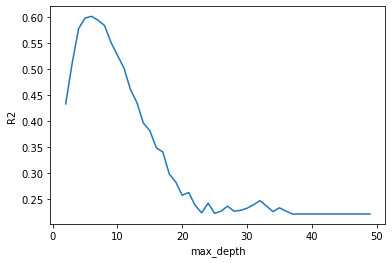

In [23]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, DT_scores['Test Score']);
plt.xlabel('max_depth')
plt.ylabel('R2');

In [24]:
#Sorting datafram of the above graph to find the exact value of max_depth that leads to the highest value of R2
sorted_DT_scores = DT_scores.sort_values(by='Test Score', ascending=False)
sorted_DT_scores.head()

,Test Score,Train Score
6,0.601865,0.613026
5,0.598552,0.603239
7,0.594296,0.626657
8,0.584302,0.641062
4,0.578299,0.585696


In [25]:
#The above sort shows the a max_depth of 6 gives the highest Test Score of 0.601865

#Running Decision Tree model again with optimized max_depth of 6.
dec_tree_md6 = DecisionTreeRegressor(max_depth = 6, random_state = 23)
dec_tree_md6.fit(X_train_processed, y_train)
DT_train_md6_score = dec_tree_md6.score(X_train_processed, y_train)
DT_test_md6_score = dec_tree_md6.score(X_test_processed, y_test)

print(f"Decesson Tree(max_depth=6) Score (as R2) of trained data:  {DT_train_md6_score}")
print(f"Decesson Tree(max_depth=6) Score (as R2) of test data:  {DT_test_md6_score}")

Decesson Tree(max_depth=6) Score (as R2) of trained data:  0.6130256864007801
Decesson Tree(max_depth=6) Score (as R2) of test data:  0.6018646036757556


Score for test data improved to 60.18%.  This is also an improvement over the initial R2 test score of 53.64%.  This model as of now is the prefered choice, but I would like to explore more tuning to get a higher Decision Tree test score of >= 90%.

In [26]:
####Compare the performance of your model based on rmse.####

print(f"Model Training RMSE:  {SKL_train_RMSE}")
print(f"Model Testing RMSE:  {SKL_test_RMSE}")

Model Training RMSE:  1162.1494784259935
Model Testing RMSE:  1170.1898291248199


The goal is to have the lowest RMSE possible.  In this case, RMSE represents a predicted sales.  With the tested Decision Tree R2 being at 60.18%, this tells me that my tested RMSE of 1170.18 will be in this range about 60.18% of the time.  Meaning there is another 40% chance RMSE will be some value higher.  This overall is not a good result.  Ideally I would aim to tune models where test data produces the lowest RMSE possible and the highest R2 possible.  Where R2 is as close to 1 as possible.

#3. You now have tried 2 different models on your data set. You need to determine which model to implement.

* Overall, which model do you recommend?
* Justify your recommendation.

I recommend the decision tree model over the linear regression model for two reasons.
1.  The decision tree model has many variables that I can use to tune the model to find optimal target predections.
2.  The tuning of a single decision tree variable produced a higher R2 score than that produced the the linear regression model.  The expectation is that by tuning more variables in the decision tree, a more accurate and optimized R2 is produced.

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [32]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [34]:
df.shape

(8523, 12)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

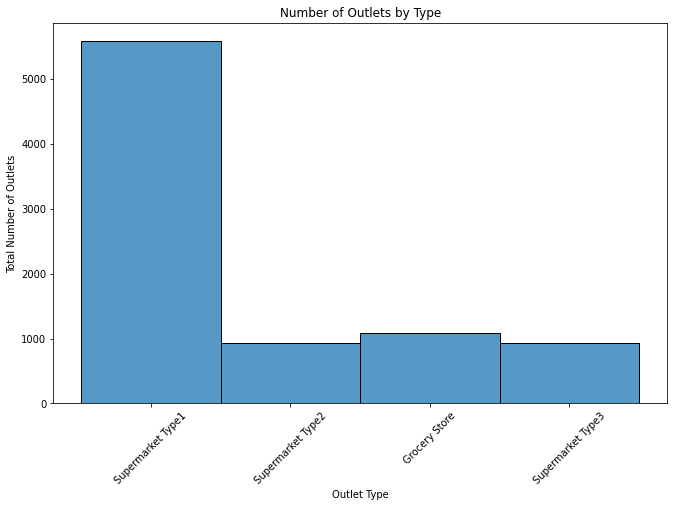

In [44]:
fig,ax = plt.subplots(figsize=(11,7));
sns.histplot(data=df, x="Outlet_Type", ax = ax);
plt.xticks(rotation=45);
plt.title("Number of Outlets by Type")
plt.xlabel("Outlet Type");
plt.ylabel("Total Number of Outlets");